### Visualization library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### import the data

In [2]:
files = os.listdir('Desktop/Projects/dataset/data/')
for file in files:
    print(file)

test.csv
data_description.txt
train.csv
sample_submission.csv


In [3]:
train_df = pd.read_csv('Desktop/Projects/dataset/data/train.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [4]:
#shape of the data
train_df.shape

(1460, 81)

In [5]:
#information about data columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#statistical description of the dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#correlation
corr = train_df.corr().T
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


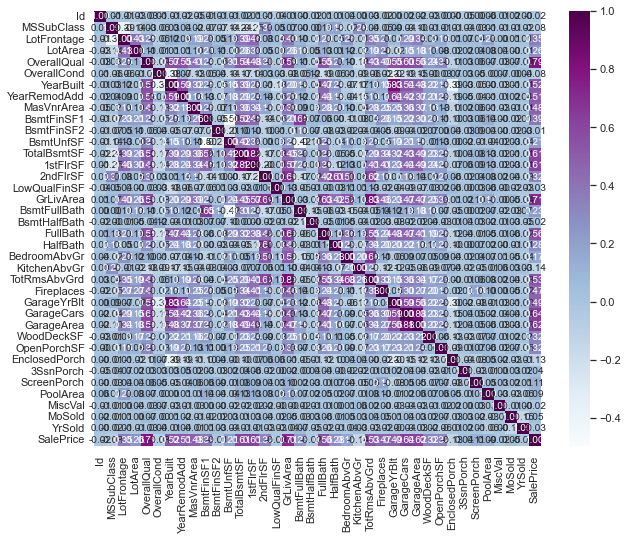

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           cmap='BuPu',
           fmt='.2f',
           annot=True)
plt.show()

### Feature Selection

We select numerical fetures that are greater than 0.50, and categorical features that actually contributed to predicting the target variable.

In [9]:
df_temp = train_df.copy()
num_cols = list(df_temp.corr()['SalePrice'][(df_temp.corr()['SalePrice']>0.50)|(df_temp.corr()['SalePrice']<-0.50)].index)

num_cols
                                             

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [10]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [11]:
cat_cols = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'BldgType', 'BsmtQual', 'Heating', 'KitchenQual', 'SaleCondition']

data = num_cols + cat_cols
data = df_temp[data]


In [12]:
data.head().T

,0,1,2,3,4
OverallQual,7,6,7,7,8
YearBuilt,2003,1976,2001,1915,2000
YearRemodAdd,2003,1976,2002,1970,2000
TotalBsmtSF,856,1262,920,756,1145
1stFlrSF,856,1262,920,961,1145
GrLivArea,1710,1262,1786,1717,2198
FullBath,2,2,2,1,2
TotRmsAbvGrd,8,6,6,7,9
GarageCars,2,2,2,3,3
GarageArea,548,460,608,642,836


### Rearrange columns

In [13]:
data.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'MSZoning', 'Street', 'LandContour', 'Utilities',
       'LandSlope', 'Neighborhood', 'BldgType', 'BsmtQual', 'Heating',
       'KitchenQual', 'SaleCondition'],
      dtype='object')

In [14]:
feature_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'MSZoning', 'Street', 'LandContour', 'Utilities',
       'LandSlope', 'Neighborhood', 'BldgType', 'BsmtQual', 'Heating',
       'KitchenQual', 'SaleCondition', 'SalePrice']

updated_data = data[feature_cols]
updated_data.head().T

,0,1,2,3,4
OverallQual,7,6,7,7,8
YearBuilt,2003,1976,2001,1915,2000
YearRemodAdd,2003,1976,2002,1970,2000
TotalBsmtSF,856,1262,920,756,1145
1stFlrSF,856,1262,920,961,1145
GrLivArea,1710,1262,1786,1717,2198
FullBath,2,2,2,1,2
TotRmsAbvGrd,8,6,6,7,9
GarageCars,2,2,2,3,3
GarageArea,548,460,608,642,836


<Figure size 720x576 with 0 Axes>

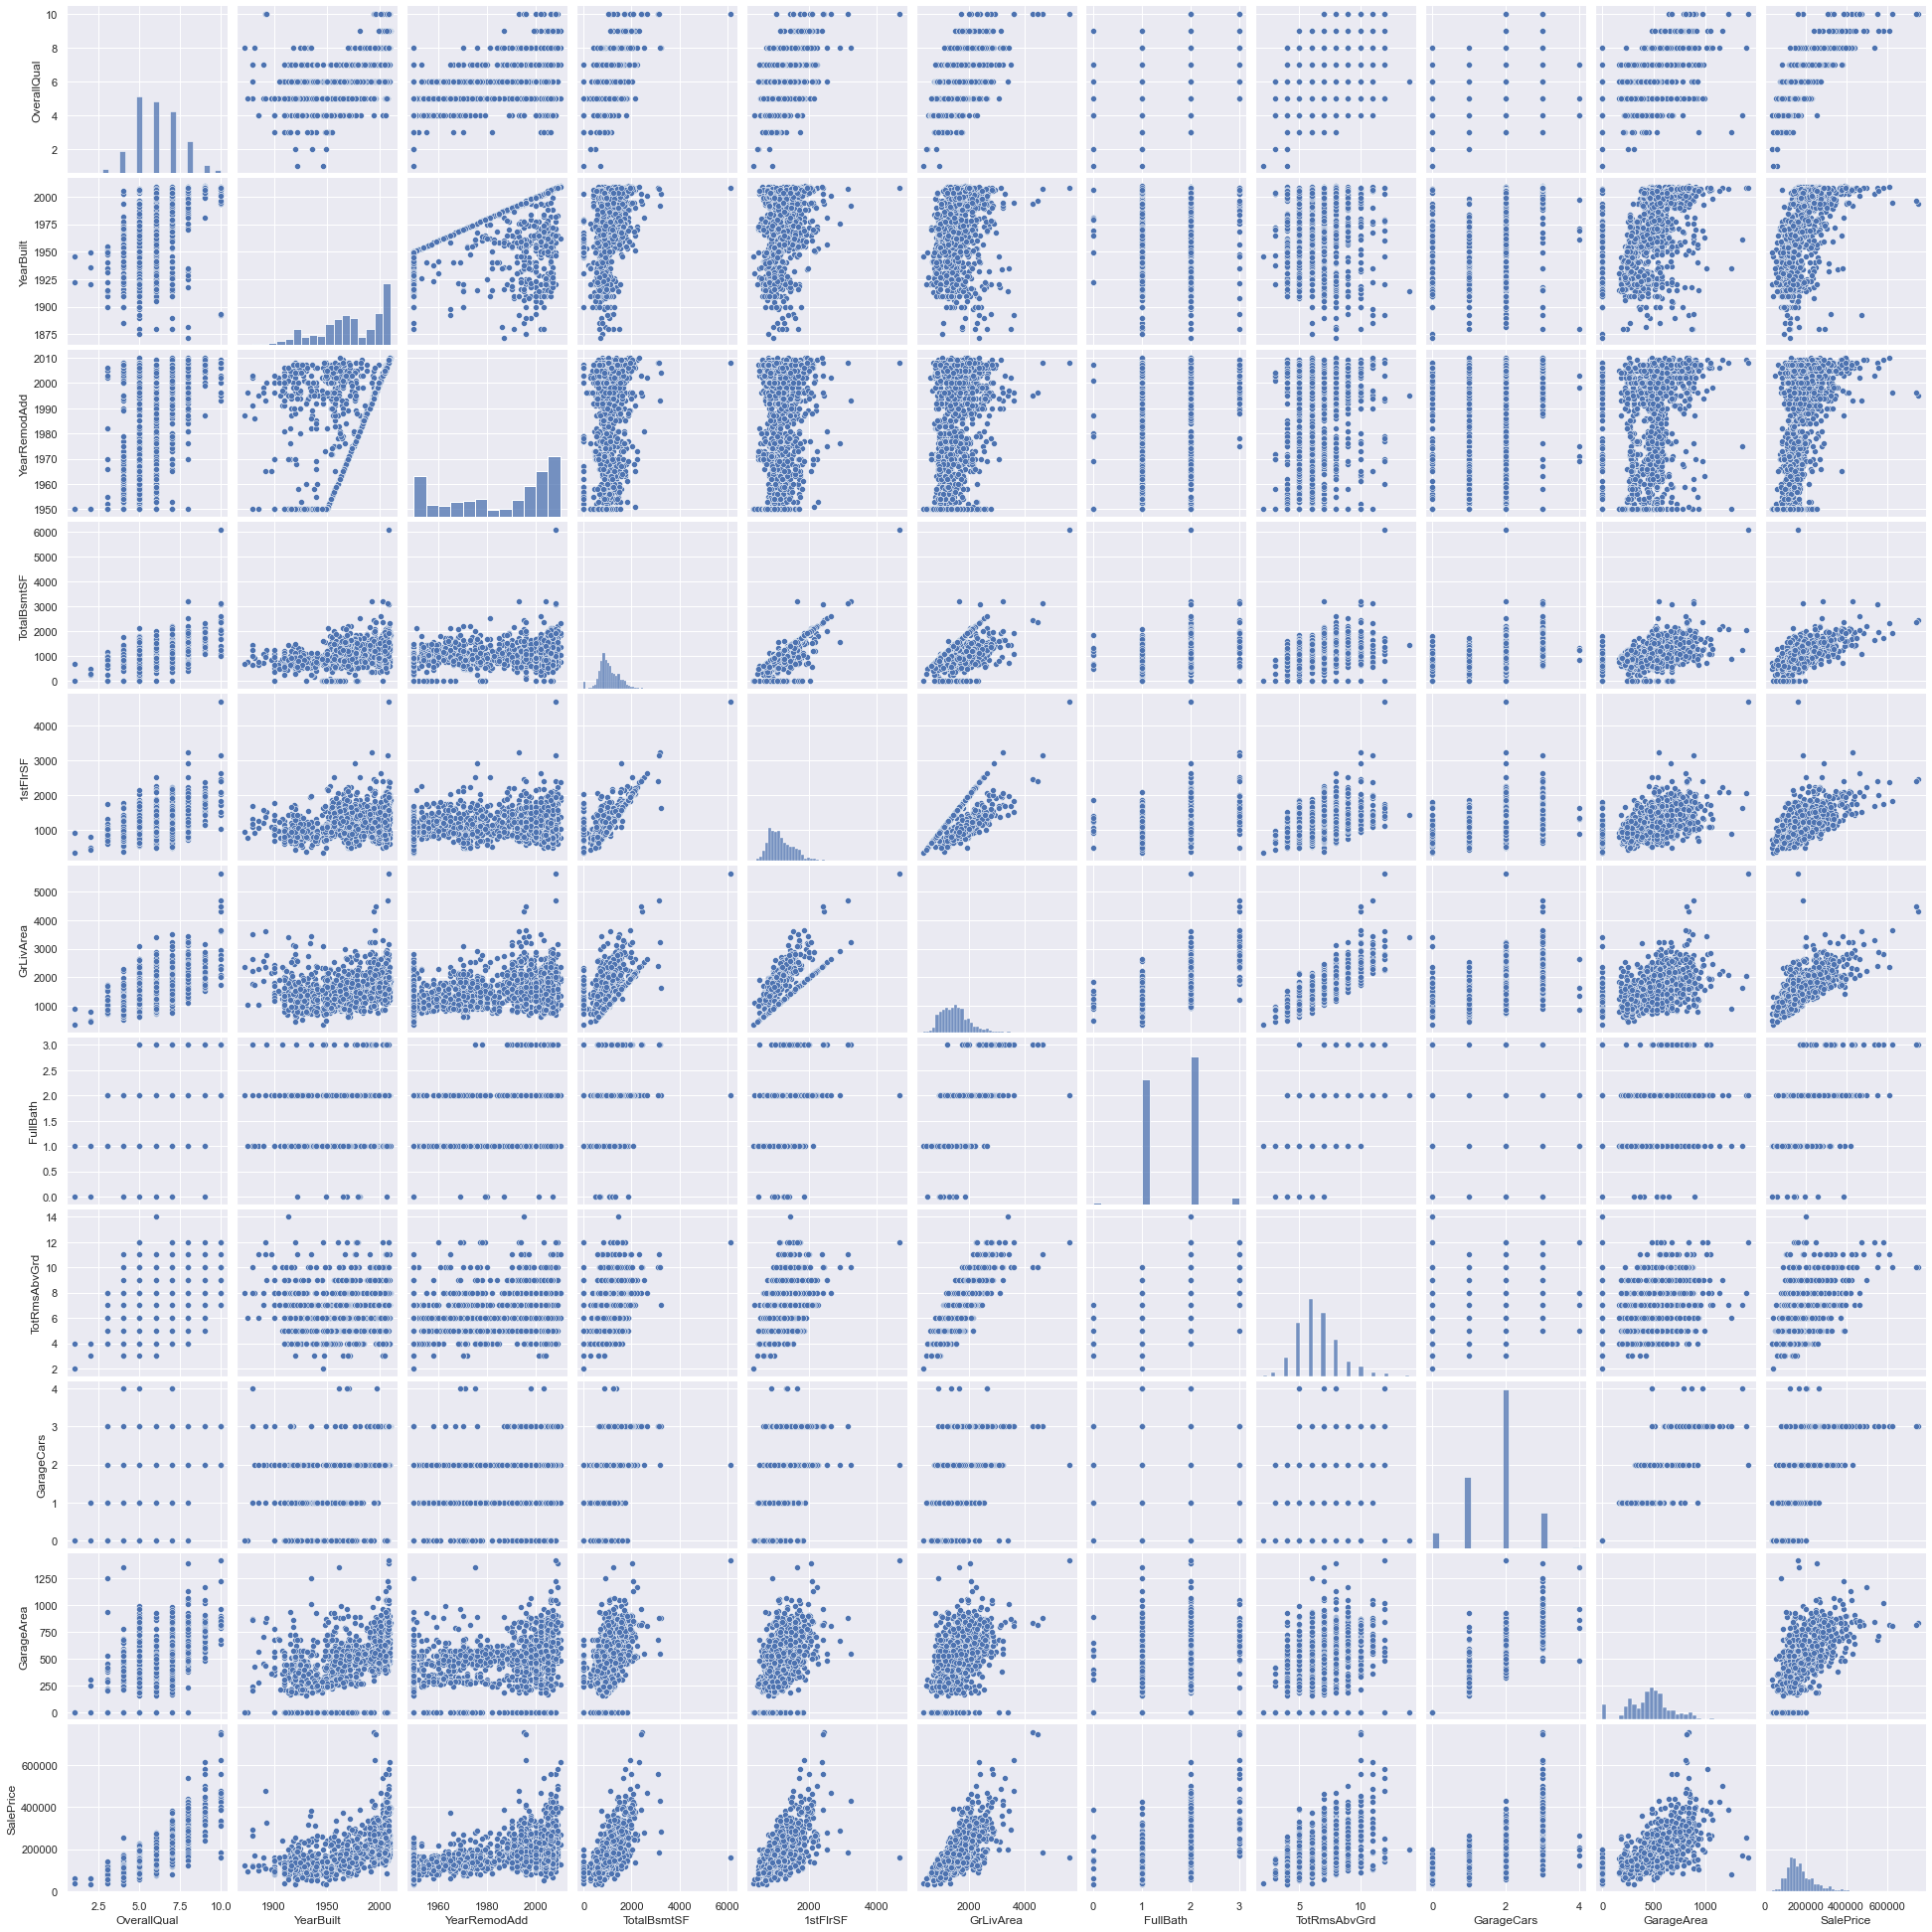

In [15]:
plt.figure(figsize=(10,8))
sns.pairplot(updated_data)
plt.show()

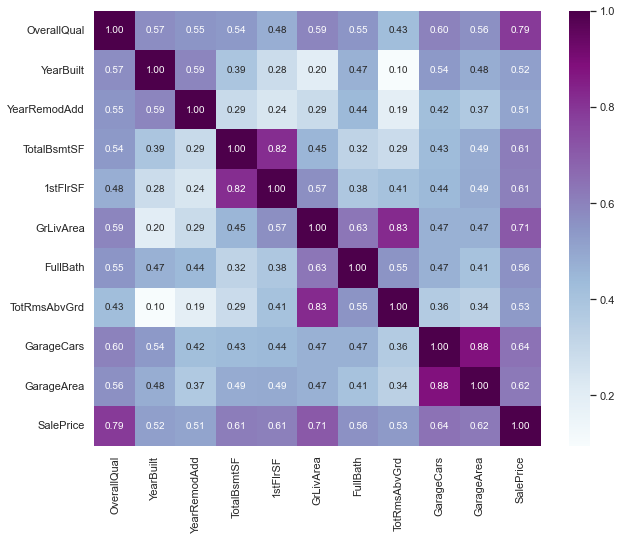

In [16]:
corr_updated = updated_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_updated,
           fmt='.2f',
           annot=True,
           cmap='BuPu')
plt.show()

### Data Preprocessing

***Outlier Detection***

In [17]:
updated_data.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


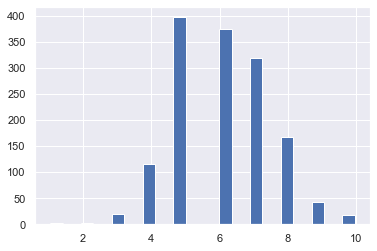

In [18]:
plt.hist(updated_data['OverallQual'], rwidth=0.8, bins=20)
plt.show()

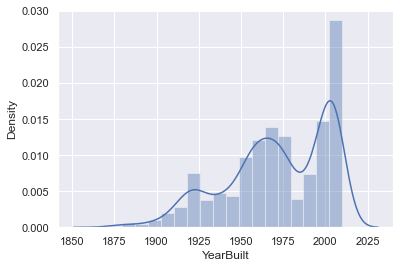

In [19]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(updated_data['YearBuilt'])
plt.show()

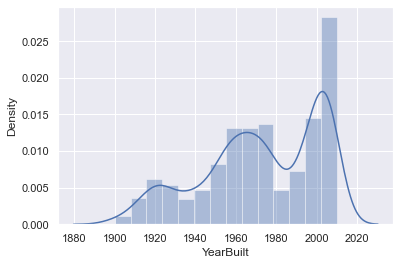

In [20]:
q = updated_data['YearBuilt'].quantile(0.01)
df = updated_data[updated_data['YearBuilt']>q]
sns.distplot(df['YearBuilt'])
plt.show()

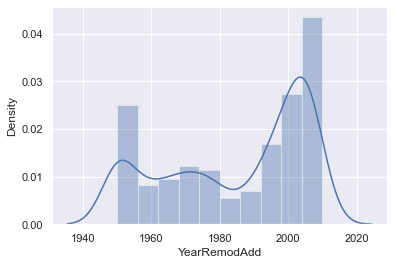

In [21]:
sns.distplot(df['YearRemodAdd'])
plt.show()

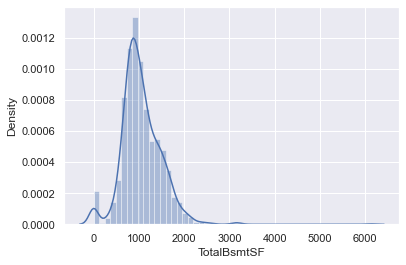

In [22]:
sns.distplot(df['TotalBsmtSF'])
plt.show()

In [23]:
df[df['TotalBsmtSF'] > df['TotalBsmtSF'].mean() + 3*df['TotalBsmtSF'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
224,10,2003,2003,2392,2392,2392,2,8,3,968,...,Lvl,AllPub,Gtl,NridgHt,1Fam,Ex,GasA,Ex,Normal,386250
332,8,2003,2004,3206,1629,1629,2,7,3,880,...,Lvl,AllPub,Gtl,NridgHt,1Fam,Gd,GasA,Gd,Normal,284000
440,10,2008,2008,3094,2402,2402,2,10,3,672,...,Lvl,AllPub,Gtl,NridgHt,1Fam,Ex,GasA,Ex,Normal,555000
496,8,1992,1993,3200,3228,3228,3,10,2,546,...,Lvl,AllPub,Gtl,NoRidge,1Fam,Gd,GasA,Gd,Normal,430000
523,10,2007,2008,3138,3138,4676,3,11,3,884,...,Bnk,AllPub,Gtl,Edwards,1Fam,Ex,GasA,Ex,Partial,184750
691,10,1994,1995,2444,2444,4316,3,10,3,832,...,Lvl,AllPub,Gtl,NoRidge,1Fam,Ex,GasA,Ex,Normal,755000
1044,8,1981,1981,2524,2524,2524,2,9,2,542,...,Lvl,AllPub,Gtl,NWAmes,1Fam,Gd,GasA,Gd,Normal,278000
1182,10,1996,1996,2396,2411,4476,3,10,3,813,...,Lvl,AllPub,Gtl,NoRidge,1Fam,Ex,GasA,Ex,Abnorml,745000
1298,10,2008,2008,6110,4692,5642,2,12,2,1418,...,Bnk,AllPub,Gtl,Edwards,1Fam,Ex,GasA,Ex,Partial,160000
1373,10,2001,2002,2633,2633,2633,2,8,3,804,...,Lvl,AllPub,Gtl,NoRidge,1Fam,Ex,GasA,Ex,Normal,466500


In [24]:
df2 = df[df['TotalBsmtSF'] <= df['TotalBsmtSF'].mean() + 3*df['TotalBsmtSF'].std()]
df2.shape

(1435, 22)

In [25]:
df2[df2['1stFlrSF'] > df2['1stFlrSF'].mean() + 3*df2['1stFlrSF'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
113,6,1953,1953,1809,2259,2259,2,7,2,450,...,Bnk,AllPub,Gtl,Crawfor,1Fam,Gd,GasA,Gd,Abnorml,217000
178,9,2008,2009,2216,2234,2234,2,9,3,1166,...,Lvl,AllPub,Gtl,StoneBr,1Fam,Ex,GasA,Ex,Partial,501837
529,6,1957,1975,2035,2515,2515,3,9,2,484,...,Lvl,AllPub,Gtl,Crawfor,1Fam,TA,GasA,TA,Alloca,200624
898,9,2009,2010,2330,2364,2364,2,11,3,820,...,Lvl,AllPub,Gtl,NridgHt,1Fam,Ex,GasA,Ex,Partial,611657
1024,8,1976,1976,1565,2898,2898,2,10,2,665,...,Lvl,AllPub,Gtl,Timber,1Fam,Gd,GasA,Gd,Abnorml,287000


In [26]:
df3 = df2[df2['1stFlrSF'] <= df2['1stFlrSF'].mean() + 3*df2['1stFlrSF'].std()]
df3.shape

(1430, 22)

In [27]:
df3[df3['GrLivArea'] > df3['GrLivArea'].mean() + 3*df3['GrLivArea'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
58,10,2006,2006,1410,1426,2945,3,10,3,641,...,HLS,AllPub,Gtl,StoneBr,1Fam,Ex,GasA,Gd,Partial,438780
118,7,1990,1990,1673,1699,3222,3,11,3,594,...,Lvl,AllPub,Gtl,SawyerW,1Fam,Gd,GasA,Gd,Normal,320000
197,8,1918,1990,1360,1360,3112,2,8,2,795,...,Lvl,AllPub,Gtl,NAmes,1Fam,TA,GasA,Gd,Abnorml,235000
324,7,1967,2007,710,1898,2978,2,11,2,564,...,Lvl,AllPub,Gtl,NAmes,1Fam,Gd,GasA,Gd,Normal,242000
608,8,1934,1998,965,1940,3194,2,10,2,380,...,HLS,AllPub,Mod,Crawfor,1Fam,Gd,GasA,TA,Alloca,359100
635,6,1914,1995,1440,1440,3395,2,14,0,0,...,Bnk,AllPub,Gtl,SWISU,2fmCon,TA,GasA,Fa,Abnorml,200000
769,8,2003,2003,1650,1690,3279,3,12,3,841,...,HLS,AllPub,Mod,StoneBr,1Fam,Gd,GasA,Ex,Normal,538000
798,9,2008,2009,1926,1966,3140,3,11,3,820,...,Lvl,AllPub,Gtl,NridgHt,1Fam,Ex,GasA,Ex,Partial,485000
1031,7,1920,1970,824,1687,3082,2,12,2,672,...,Lvl,AllPub,Gtl,SWISU,1Fam,TA,GasA,TA,Normal,197000
1169,10,1995,1996,1930,1831,3627,3,10,3,807,...,Lvl,AllPub,Gtl,NoRidge,1Fam,Ex,GasA,Gd,Normal,625000


In [28]:
df4 = df3[df3['GrLivArea'] <= df3['GrLivArea'].mean() + df3['GrLivArea'].std()]
df4.shape

(1225, 22)

In [29]:
df4[df4['TotRmsAbvGrd'] > df4['TotRmsAbvGrd'].mean() + 3*df4['TotRmsAbvGrd'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
144,5,1963,1963,1728,1728,1728,2,10,2,504,...,Lvl,AllPub,Gtl,Sawyer,Duplex,TA,GasA,TA,Abnorml,125000
330,5,1964,1964,1728,1728,1728,2,10,1,352,...,Lvl,AllPub,Gtl,NAmes,Duplex,TA,GasA,TA,Normal,119000
447,7,1998,1999,930,956,1886,2,10,2,431,...,Lvl,AllPub,Gtl,Gilbert,1Fam,Gd,GasA,Gd,Normal,199900
505,5,1952,1952,960,960,1960,2,10,2,400,...,Lvl,AllPub,Gtl,OldTown,Duplex,TA,GasA,TA,Normal,124500
570,5,1965,1965,1728,1728,1728,2,10,2,576,...,Lvl,AllPub,Gtl,NAmes,Duplex,TA,GasA,TA,Normal,142600
843,5,1961,1961,1800,1800,1800,2,10,0,0,...,Lvl,AllPub,Gtl,NAmes,Duplex,TA,GasA,TA,Normal,141000
1030,5,1916,1995,686,948,1928,2,10,0,0,...,Lvl,AllPub,Gtl,SWISU,2fmCon,TA,GasA,TA,Normal,160000
1275,5,1948,1950,928,928,1920,2,10,2,400,...,Lvl,AllPub,Gtl,NAmes,Duplex,TA,GasA,TA,Normal,137000


In [30]:
df5 = df4[df4['TotRmsAbvGrd'] <= df4['TotRmsAbvGrd'].mean() + 3*df4['TotRmsAbvGrd'].std()]
df5.shape

(1217, 22)

In [31]:
df5[df5['GarageCars'] > df5['GarageCars'].mean() + 3*df5['GarageCars'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
420,7,1997,1998,1344,1344,1344,2,8,4,784,...,Lvl,AllPub,Gtl,Mitchel,Duplex,Gd,GasA,TA,Alloca,206300
1190,4,1961,1975,1249,1622,1622,1,7,4,1356,...,Low,AllPub,Mod,Mitchel,2fmCon,TA,GasA,TA,Normal,168000
1340,4,1971,1971,858,872,872,1,5,4,480,...,Lvl,AllPub,Gtl,NAmes,1Fam,TA,GasA,TA,Normal,123000


In [32]:
df6 = df5[df5['GarageCars'] <= df5['GarageCars'].mean() + 3*df5['GarageCars'].std()]
df6.shape

(1214, 22)

In [33]:
df6[df6['GarageArea'] > df6['GarageArea'].mean() + 3*df6['GarageArea'].std()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
270,8,2006,2006,1095,1095,1939,2,8,3,1053,...,Lvl,AllPub,Gtl,Somerst,1Fam,Gd,GasA,Gd,Partial,266000
1061,3,1935,1950,894,894,894,1,6,3,1248,...,Low,AllPub,Gtl,IDOTRR,1Fam,TA,GasA,TA,Normal,81000
1087,8,2005,2006,1082,1082,1953,2,9,3,1043,...,Lvl,AllPub,Gtl,Somerst,1Fam,Gd,GasA,Gd,Normal,252000
1228,9,2008,2008,1702,1702,1702,1,7,3,1052,...,Lvl,AllPub,Gtl,NridgHt,TwnhsE,Ex,GasA,Ex,Partial,367294


In [34]:
df7 = df6[df6['GarageArea'] <= df6['GarageArea'].mean() + 3*df6['GarageArea'].std()]
df7.shape

(1210, 22)

In [35]:
data_without_outlier = df7.copy()
data_without_outlier.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,5.878512,1970.630579,1983.591736,1002.682645,1098.387603,1345.287603,1.472727,6.055372,1.660331,440.343802,162435.996694
std,1.262536,28.811011,21.059416,375.875549,327.672759,331.704793,0.523714,1.211091,0.700582,192.192678,56332.498185
min,1.000000,1900.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1964.000000,773.250000,855.000000,1078.500000,1.000000,5.000000,1.000000,305.250000,126625.000000
50%,6.000000,1971.000000,1991.500000,949.000000,1040.000000,1358.000000,1.000000,6.000000,2.000000,452.500000,153000.000000
75%,7.000000,2000.000000,2004.000000,1243.500000,1319.750000,1620.000000,2.000000,7.000000,2.000000,550.000000,188925.000000
max,10.000000,2010.000000,2010.000000,1932.000000,1959.000000,1971.000000,3.000000,9.000000,3.000000,1025.000000,395192.000000


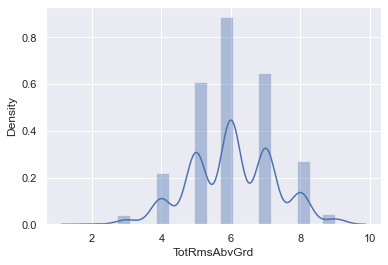

In [36]:
sns.distplot(data_without_outlier['TotRmsAbvGrd'])
plt.show()

***Missing values***

In [37]:
data_without_outlier.isna().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
MSZoning          0
Street            0
LandContour       0
Utilities         0
LandSlope         0
Neighborhood      0
BldgType          0
BsmtQual         34
Heating           0
KitchenQual       0
SaleCondition     0
SalePrice         0
dtype: int64

In [38]:
new_data = data_without_outlier.dropna(axis=0)
new_data.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
MSZoning         0
Street           0
LandContour      0
Utilities        0
LandSlope        0
Neighborhood     0
BldgType         0
BsmtQual         0
Heating          0
KitchenQual      0
SaleCondition    0
SalePrice        0
dtype: int64

***Convert categories to numerical columns***

In [39]:
df_temp = new_data.copy()
df_temp.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,...,Lvl,AllPub,Gtl,CollgCr,1Fam,Gd,GasA,Gd,Normal,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,Lvl,AllPub,Gtl,Veenker,1Fam,Gd,GasA,TA,Normal,181500
2,7,2001,2002,920,920,1786,2,6,2,608,...,Lvl,AllPub,Gtl,CollgCr,1Fam,Gd,GasA,Gd,Normal,223500
3,7,1915,1970,756,961,1717,1,7,3,642,...,Lvl,AllPub,Gtl,Crawfor,1Fam,TA,GasA,Gd,Abnorml,140000
5,5,1993,1995,796,796,1362,1,5,2,480,...,Lvl,AllPub,Gtl,Mitchel,1Fam,Gd,GasA,TA,Normal,143000


In [40]:
df_temp.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'BldgType', 'BsmtQual', 'Heating', 'KitchenQual',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [41]:
num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_temp[['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [43]:
vif

,VIF,Features
0,50.793157,OverallQual
1,9348.914099,YearBuilt
2,9159.370908,YearRemodAdd
3,63.863694,TotalBsmtSF
4,76.408683,1stFlrSF
5,64.692683,GrLivArea
6,16.712110,FullBath
7,63.779121,TotRmsAbvGrd
8,35.879751,GarageCars
9,30.595403,GarageArea


In [44]:
df = df_temp.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
0,7,856,856,1710,2,8,2,548,RL,Pave,Lvl,AllPub,Gtl,CollgCr,1Fam,Gd,GasA,Gd,Normal,208500
1,6,1262,1262,1262,2,6,2,460,RL,Pave,Lvl,AllPub,Gtl,Veenker,1Fam,Gd,GasA,TA,Normal,181500
2,7,920,920,1786,2,6,2,608,RL,Pave,Lvl,AllPub,Gtl,CollgCr,1Fam,Gd,GasA,Gd,Normal,223500
3,7,756,961,1717,1,7,3,642,RL,Pave,Lvl,AllPub,Gtl,Crawfor,1Fam,TA,GasA,Gd,Abnorml,140000
5,5,796,796,1362,1,5,2,480,RL,Pave,Lvl,AllPub,Gtl,Mitchel,1Fam,Gd,GasA,TA,Normal,143000


In [45]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LandContour
Utilities
LandSlope
Neighborhood
BldgType
BsmtQual
Heating
KitchenQual
SaleCondition


In [46]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['Street'] = le.fit_transform(df['Street'])
df['LandContour'] = le.fit_transform(df['LandContour'])
df['Utilities'] = le.fit_transform(df['Utilities'])
df['LandSlope'] = le.fit_transform(df['LandSlope'])
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['BsmtQual'] = le.fit_transform(df['BsmtQual'])
df['Heating'] = le.fit_transform(df['Heating'])
df['KitchenQual'] = le.fit_transform(df['KitchenQual'])
df['SaleCondition'] = le.fit_transform(df['SaleCondition'])
df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
0,7,856,856,1710,2,8,2,548,3,1,3,0,0,5,0,2,0,2,4,208500
1,6,1262,1262,1262,2,6,2,460,3,1,3,0,0,24,0,2,0,3,4,181500
2,7,920,920,1786,2,6,2,608,3,1,3,0,0,5,0,2,0,2,4,223500
3,7,756,961,1717,1,7,3,642,3,1,3,0,0,6,0,3,0,2,0,140000
5,5,796,796,1362,1,5,2,480,3,1,3,0,0,11,0,2,0,3,4,143000


### More visualize

In [49]:
num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

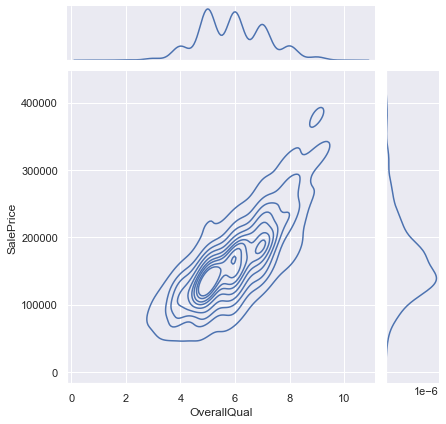

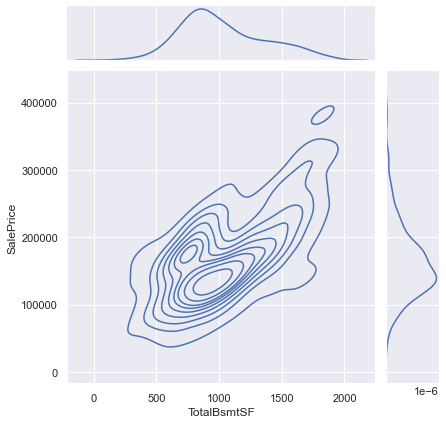

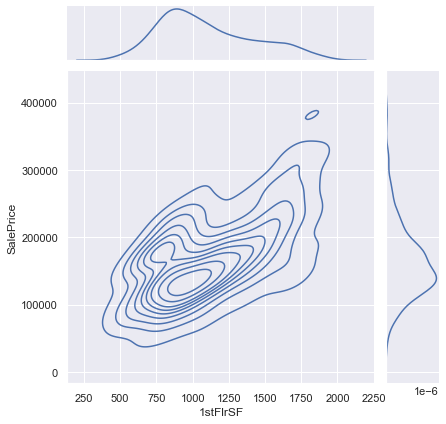

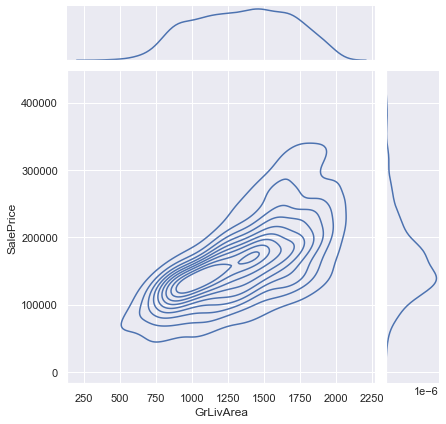

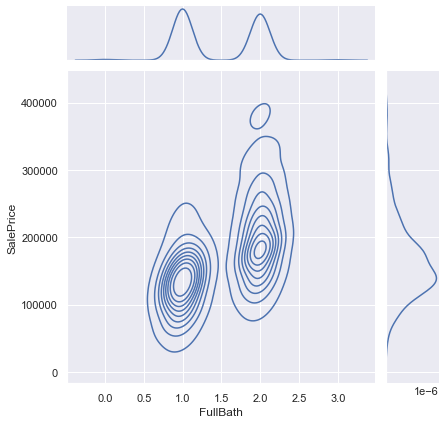

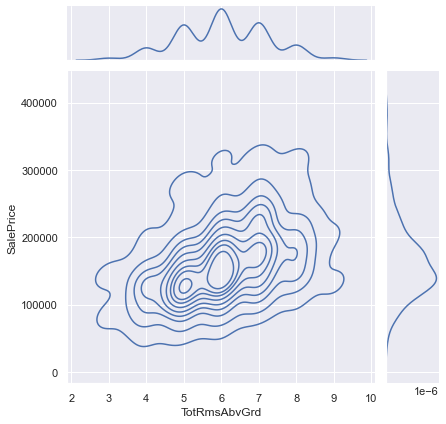

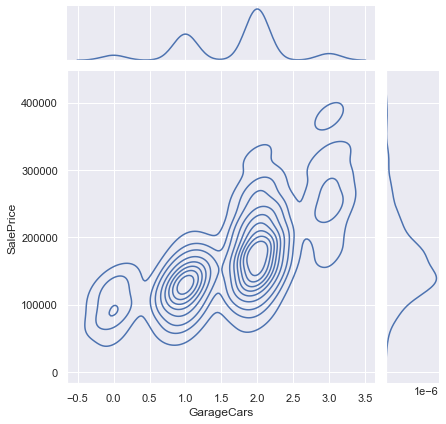

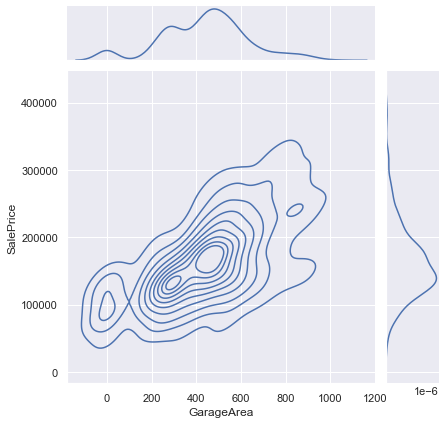

In [50]:
sns.jointplot(df['OverallQual'], df['SalePrice'], kind='kde')
sns.jointplot(df['TotalBsmtSF'], df['SalePrice'], kind='kde')
sns.jointplot(df['1stFlrSF'], df['SalePrice'], kind='kde')
sns.jointplot(df['GrLivArea'], df['SalePrice'], kind='kde')
sns.jointplot(df['FullBath'], df['SalePrice'], kind='kde')
sns.jointplot(df['TotRmsAbvGrd'], df['SalePrice'], kind='kde')
sns.jointplot(df['GarageCars'], df['SalePrice'], kind='kde')
sns.jointplot(df['GarageArea'], df['SalePrice'], kind='kde')
plt.show()

In [51]:
df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,BldgType,BsmtQual,Heating,KitchenQual,SaleCondition,SalePrice
0,7,856,856,1710,2,8,2,548,3,1,3,0,0,5,0,2,0,2,4,208500
1,6,1262,1262,1262,2,6,2,460,3,1,3,0,0,24,0,2,0,3,4,181500
2,7,920,920,1786,2,6,2,608,3,1,3,0,0,5,0,2,0,2,4,223500
3,7,756,961,1717,1,7,3,642,3,1,3,0,0,6,0,3,0,2,0,140000
5,5,796,796,1362,1,5,2,480,3,1,3,0,0,11,0,2,0,3,4,143000


### Modeling and Evaluation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
#split the data into features and labl
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [54]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

***Standardization***

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
print(X_train_scaled[:10])

[[ 0.04976504 -0.64732942 -0.87212104 -0.54116227 -0.90691389 -0.06079149
   0.46482637  0.43659223  1.48552293  0.05658363  0.3083865   0.
  -0.21017007 -1.46888929 -0.41331129  0.8255644  -0.11163985  0.7636039
   0.22243895]
 [-0.74310174  0.23538549  0.0508069  -0.71157445 -0.90691389 -0.06079149
  -2.3724255  -2.32009569 -0.02736066  0.05658363  0.3083865   0.
  -0.21017007 -0.15419666 -0.41331129 -0.41807428 -0.11163985  0.7636039
   1.11983216]
 [-0.74310174 -0.50795338 -0.72639558 -1.49060156 -0.90691389 -0.9011444
   0.46482637  1.43902419 -0.02736066  0.05658363  0.3083865   0.
  -0.21017007  0.01013992 -0.41331129  0.8255644  -0.11163985 -0.57057392
   0.22243895]
 [ 0.04976504  0.07278012  0.74907475 -0.01166728  1.00024284  0.77956142
   0.46482637  0.17554223 -0.02736066  0.05658363  0.3083865   0.
  -0.21017007  0.33881307 -0.41331129 -0.41807428 -0.11163985  0.7636039
   0.22243895]
 [ 1.63549861  1.87886128  1.83290789  1.07471037  1.00024284 -0.06079149
   0.46482637 

In [56]:
models = pd.DataFrame(columns = ['Models', 'MAE', 'MSE', 'R2_squared', 'RMSE'])
models

,Models,MAE,MSE,R2_squared,RMSE


In [57]:
def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r2_squared = r2_score(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mse, r2_squared, rmse

### Linear Regression

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
predictions = lin_reg.predict(X_test_scaled)
mae, mse, r2_squared, rmse = evaluate(y_test, predictions)
print('mean_absolute_error ', mae)
print('mean_squared_error ', mse)
print('r2 score ', r2_squared)
print('root_mean_squared_error ', rmse)

mean_absolute_error  18519.86850514883
mean_squared_error  677636416.4467357
r2 score  0.7601178361975991
root_mean_squared_error  26031.450525215372


In [59]:
new_row = {'Models' : 'LinearRegression', 'MAE':mae, 'MSE':mse, 'R_squared': r2_squared, 'RMSE': rmse}
models = models.append(new_row, ignore_index=True)
models

,Models,MAE,MSE,R2_squared,RMSE,R_squared
0,LinearRegression,18519.868505,677636416.446736,NaN,26031.450525,0.760118


In [60]:
models.drop('R2_squared', axis=1, inplace=True)

In [61]:
models

,Models,MAE,MSE,RMSE,R_squared
0,LinearRegression,18519.868505,677636416.446736,26031.450525,0.760118


### Elastic Net

In [62]:
Enet = ElasticNet()
Enet.fit(X_train_scaled, y_train)
predictions = Enet.predict(X_test_scaled)

mae, mse, r2_squared, rmse = evaluate(y_test, predictions)
print('mae ', mae)
print('mse ', mse)
print('r2_squared ', r2_squared)
print('rmse ', rmse)
new_row2 = {'Models': 'Elastic Net', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R_squared':r2_squared}

models = models.append(new_row2, ignore_index=True)
models

mae  17941.10624409272
mse  704117311.2933886
r2_squared  0.7507436434873727
rmse  26535.20889861975


,Models,MAE,MSE,RMSE,R_squared
0,LinearRegression,18519.868505,677636416.446736,26031.450525,0.760118
1,Elastic Net,17941.106244,704117311.293389,26535.208899,0.750744


### Lasso

In [63]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
predictions = lasso.predict(X_test_scaled)

mae, mse, r2_squared, rmse = evaluate(y_test, predictions)
print('mae ', mae)
print('mse ', mse)
print('rmse', rmse)
print('r2_squared ', r2_squared)
new_row3 = {'Models': 'Lasso', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R_squared':r2_squared}
models = models.append(new_row3, ignore_index=True)
models

mae  18519.663716906136
mse  677626735.2504836
rmse 26031.264572634263
r2_squared  0.7601212633249623


,Models,MAE,MSE,RMSE,R_squared
0,LinearRegression,18519.868505,677636416.446736,26031.450525,0.760118
1,Elastic Net,17941.106244,704117311.293389,26535.208899,0.750744
2,Lasso,18519.663717,677626735.250484,26031.264573,0.760121


### Ridge

In [64]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
predictions = ridge.predict(X_test_scaled)

mae, mse, r2_squared, rmse = evaluate(y_test, predictions)
print('mae ', mae)
print('mse ', mse)
print('r2_squared ', r2_squared)
print('rmse ', rmse)
new_row4 = {'Models': 'Ridge', 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R_squared':r2_squared}
models = models.append(new_row4, ignore_index=True)
models

mae  18510.842654908545
mse  677508450.3101466
r2_squared  0.7601631359970098
rmse  26028.99249510335


,Models,MAE,MSE,RMSE,R_squared
0,LinearRegression,18519.868505,677636416.446736,26031.450525,0.760118
1,Elastic Net,17941.106244,704117311.293389,26535.208899,0.750744
2,Lasso,18519.663717,677626735.250484,26031.264573,0.760121
3,Ridge,18510.842655,677508450.310147,26028.992495,0.760163


In [66]:
models.sort_values(by='RMSE')

,Models,MAE,MSE,RMSE,R_squared
3,Ridge,18510.842655,677508450.310147,26028.992495,0.760163
2,Lasso,18519.663717,677626735.250484,26031.264573,0.760121
0,LinearRegression,18519.868505,677636416.446736,26031.450525,0.760118
1,Elastic Net,17941.106244,704117311.293389,26535.208899,0.750744
